Lecture 12 - Linear Regression 2 - linear regression strikes back

Announcements
1. Problem set 6 and quiz 6 due at the end of the week
2. Discussion board post 3 is active (due in 11 days)
3. Quiz 5 responses - check my comments!

Today's topics
1. Linear regression with train/test split <- machine learning
2. Multivariate regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Let's load our data

In [2]:
mpg = pd.read_csv('final_mpg_dataset.csv')

Check the data. Looks good

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,...,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP,HP_ordinal
0,18.0,8.0,307.000000,130.000000,3504.0,12.000000,70.0,usa,chevrolet,Sedan,...,0,0,0,0,0,0,1,0,1,3
1,14.0,8.0,167.405634,92.497143,4354.0,16.007471,70.0,usa,chevrolet,Sedan,...,0,0,0,0,0,0,1,0,1,3
2,15.0,8.0,400.000000,150.000000,3761.0,16.007471,70.0,usa,chevrolet,Sedan,...,0,0,0,0,0,0,1,0,1,3
3,24.0,4.0,113.000000,95.000000,2372.0,15.000000,70.0,japan,toyota,Coupe,...,0,1,0,0,1,1,0,1,0,2
4,26.0,4.0,12.000000,46.000000,1835.0,20.500000,70.0,europe,volkswagen,Coupe,...,0,0,1,0,1,0,0,0,0,1


Let's try seeing if weight predicts MPG

What do you think? Will it predict it? Any guesses?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight', ylabel='mpg'>

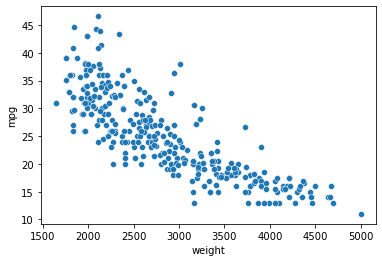

In [4]:
sns.scatterplot(mpg['weight'],mpg['mpg'])

In order to test to see if acceleration is a good predictor, we will be using linear regression. We will split the data into training and testing data and see how well the model we build with the training data predicts the testing data

Why split and do the training and testing.....?

The model is fit to the training set, so using data that participated in the learning biases our evaluation of the model. 

The testing data, however, was not a part of the model fitting. Thus, it provides an unbiased evaluation of the model. Hence why it is sometimes called the holdout dataset



We will talk more about training test and split later

In [5]:
from sklearn.model_selection import train_test_split

Here is the format we will use. Note the output variables have a capital X and lower case y for the feature and target arrays, respectively

I'm also setting the random state to 1, that way, when you run the model with the same random state, the same split in data will occur

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(mpg[['weight']],mpg['mpg'],random_state=1)

Let's check out the shape of the training and testing set

In [7]:
Xtrain.shape

(268, 1)

In [8]:
Xtest.shape

(90, 1)

In [9]:
type(Xtrain)

pandas.core.frame.DataFrame

With the default parameters, 75% of the data is in the training set and 25% is in the testing set. Typically, you want more data in the training set because that is what you use to tune the model

Changing the proportion is as easy as changing the size of the training set

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(mpg[['weight']],mpg['mpg'],random_state=1,train_size=.5)

In [11]:
Xtrain.shape

(179, 1)

But for now, let's keep it at 75% to 25%

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(mpg[['weight']],mpg['mpg'],random_state=1)

Now, let's create an instance of our linear regression

In [13]:
model = LinearRegression()
model

LinearRegression()

And let's tune the model based on the training data

In [14]:
model.fit(Xtrain,ytrain)

LinearRegression()

Cool. Let's see what this model looks like

In [15]:
model.coef_

array([-0.00850305])

In [16]:
model.intercept_

49.176244752964166

So basically, 

MPG = Weight * -0.009 + 49.2

Let's check the R^2 value to see how much of the variance in MPG is explained by acceleration

In [17]:
model.score(Xtrain,ytrain)

0.6696533048444931

Oh. Not bad! Remember, 1.0 means perfect capturing of the data

Anyways, let's see how well it predicts the testing data

In [18]:
y_model = model.predict(Xtest)

Let's see how this line fits the training data.

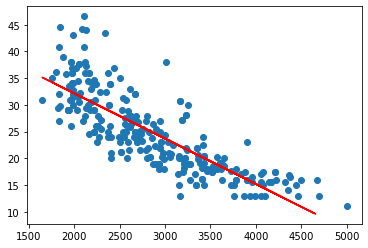

In [19]:
plt.scatter(Xtrain,ytrain)
plt.plot(Xtest,y_model,color='r')

Now, let's see how it fits the testing data. Looks good!

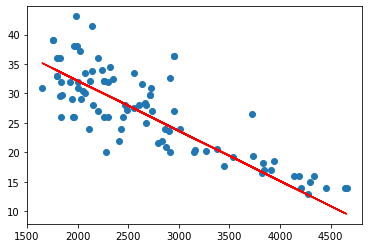

In [20]:
plt.scatter(Xtest,ytest)
plt.plot(Xtest,y_model,color='r')

Let's check the residuals

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

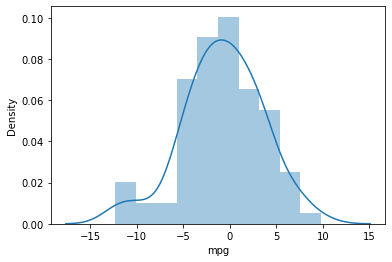

In [21]:
sns.distplot(y_model-ytest,10)

The residuals look fine

Let's looks at the residual plot next

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='mpg'>

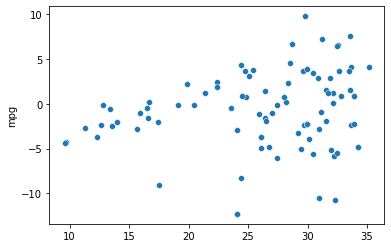

In [22]:
sns.scatterplot(y_model,y_model-ytest)

The residual plot looks okay

Let's now just check the R^2 value for the testing data. And... the result is pretty good! its similar to our training data, which is totally fine. Sometimes, that happens. Its only bad when training score is much better than testing score (more about that later!)

In [23]:
model.score(Xtest,ytest)

0.6327199333961884

I think we can conclude from this that weight is a great feature for predicting mpg. We should try a different feature though

Let's build a function to simplify this. Let's start with just returning the R^2 scores. 

In [24]:
def model_data(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)

  print('Training R^2',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
  print('y = ',model.coef_[0],'*x + ',model.intercept_)

In [25]:
model_data(mpg[['weight']],mpg['mpg'])

Training R^2 0.6696533048444931
Testing R^2 0.6327199333961884
y =  -0.008503048990218576 *x +  49.176244752964166


Good! Let's add some plots to this

Specifically, we want to add plots to see the linear model on the testing set of the data

In [26]:
def model_data2(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)
  
  print('Training R^2',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
  print('y = ',model.coef_[0],'*x + ',model.intercept_)
  
  # we need the predicted y values
  y_model = model.predict(Xtest)

  # here, we create a subplots
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[8,12])

  # unfortunately, if we are dealing with just 1 column of data, its easiest to do something like this
  # when the subplot is 1,1, axes doesn't have any size/shape or anything. It is just axes. So, you cannot say
  # axes[0]. So, here is just a check. If we are dealing with just 1 column, this should plot it and stop the function
  if Xtrain.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes)
    sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes)
    return

Let's give it a shot with the original data and we can scroll up and see if it looks about right

Training R^2 0.6696533048444931
Testing R^2 0.6327199333961884
y =  -0.008503048990218576 *x +  49.176244752964166


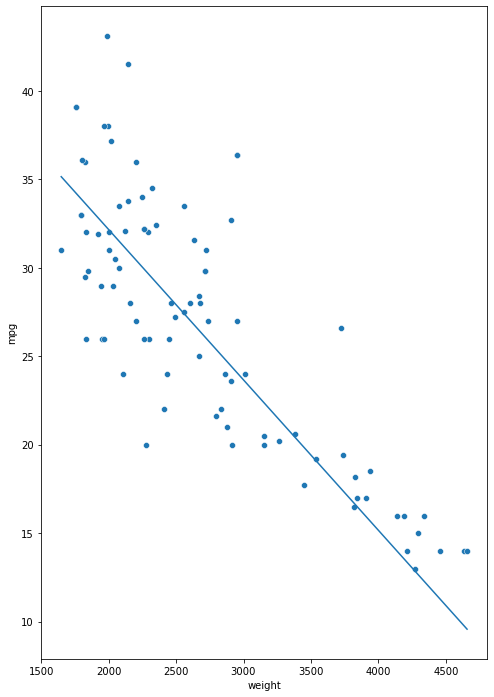

In [27]:
model_data2(mpg[['weight']],mpg['mpg'])

Looks about right!

Now, let's try other variables. 

In [28]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'Type', 'chevrolet',
       'nevs', 'nissan', 'peugeot', 'toyota', 'volkswagen', 'volvo', 'Sedan0',
       'japan', 'usa', 'MediumHP', 'HighHP', 'HP_ordinal'],
      dtype='object')

Let's try acceleration!

Training R^2 0.04606121877301994
Testing R^2 -0.012551240156991827
y =  0.7059412169121999 *x +  13.59765542123114


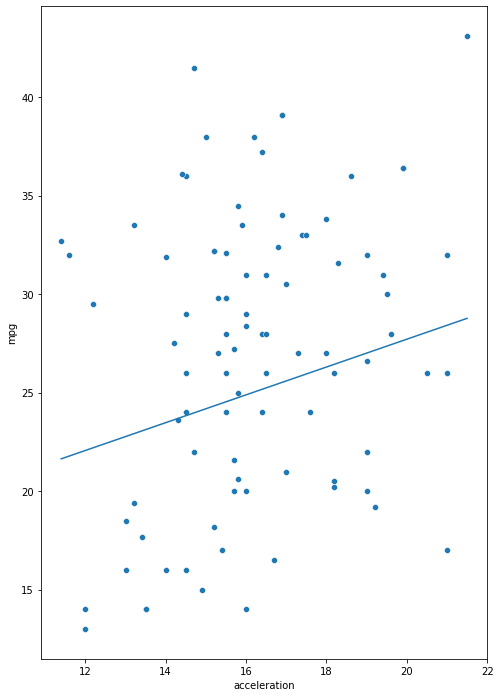

In [29]:
model_data2(mpg[['acceleration']],mpg['mpg'])

The R^2 value looks much worse.


Let's try other data

Let's look at a categorical variable. Let's just, out of curiosity, pass in the non-dummy coded variable

In [30]:
model_data2(mpg[['Type']],mpg['mpg'])

ValueError: could not convert string to float: 'Sedan'

As expected, its a string variable and it won't work! So, let's pass in the dummy coded version

Training R^2 0.5132893233320257
Testing R^2 0.33326831978390403
y =  11.176245816854276 *x +  20.889017341040464


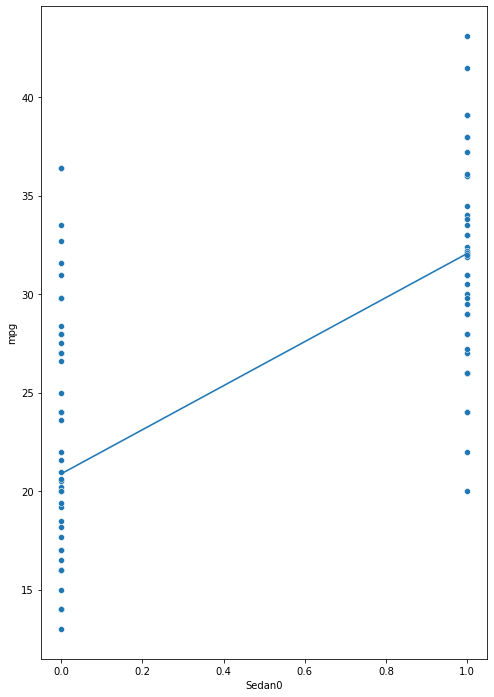

In [31]:
model_data2(mpg[['Sedan0']],mpg['mpg'])

In other words, if Sedan = 0 is the y-intercept. If we looked at the mean of mpg when sedan =0, we can test this

In [32]:
np.mean(mpg[mpg['Sedan0']==0].mpg)

21.223502304147466

Its not going to perfectly match because remember, the model is fit to a subset of the data, but its pretty close!



Now, let's play around with a few things. First, let's change the intercept and see what happens

In [33]:
def model_data2_no_intercept(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  model = LinearRegression(fit_intercept=False)
  model.fit(Xtrain,ytrain)
  
  print('Training R^2',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
  print('y = ',model.coef_[0],'*x + ',model.intercept_)
  
  # we need the predicted y values
  y_model = model.predict(Xtest)

  # here, we create a subplots
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[8,12])

  # unfortunately, if we are dealing with just 1 column of data, its easiest to do something like this
  # when the subplot is 1,1, axes doesn't have any size/shape or anything. It is just axes. So, you cannot say
  # axes[0]. So, here is just a check. If we are dealing with just 1 column, this should plot it and stop the function
  if Xtrain.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes)
    sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes)
    return

Training R^2 -1.9048717157801125
Testing R^2 -2.843401821580213
y =  0.007667626756124009 *x +  0.0


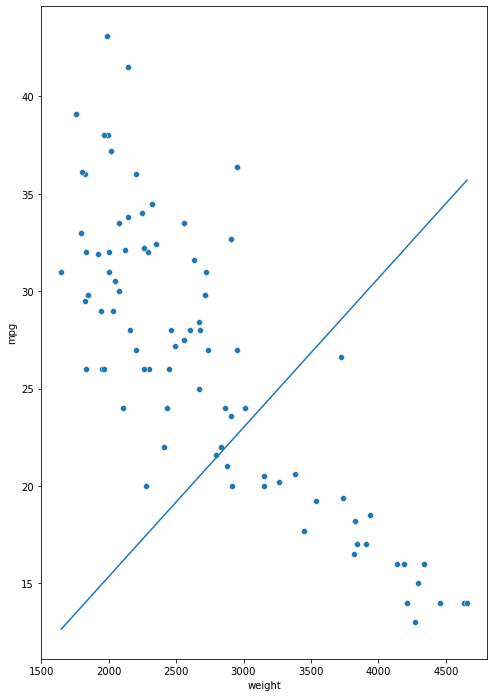

In [34]:
model_data2_no_intercept(mpg[['weight']],mpg['mpg'])

Oh wow. Not good for this data. You will rarely run a linear model with the intercept = False. Thus, always turn it on (i.e., True)!


Let's look at another thing.

Missing data! Why did we remove them? Well, let's try running the regression, but with some missing data

In [35]:
mpg['weight'][0] = np.nan
model_data2(mpg[['weight']],mpg['mpg'])

<ipython-input-35-3eff88f9d2f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['weight'][0] = np.nan


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Well, as it turns out, the code crashes. Hence, we take care of the missing data during feature engineering / data processing

We better fix that value in mpg now. I'll just reload the data

In [36]:
mpg = pd.read_csv('final_mpg_dataset.csv')

Now, let's look at horsepower. If you remember, I binned horsepower into low, medium, and high bins. The way this data was represented was either as categorical data or ordinal numerical data. Both are less precise than the continuous horsepower, but we may have theoritical reasons for binning them. However, how we bin them has consequences, as we will see below

But in order to continue, remember that horsepower when categorical was split into 2 separate columns. That means we need to adjust our function to allow us to do multiple linear regression (i.e., we have two predictors)

We need to do the following things

1. update the regression equation
2. add subplots

If this function doesn't make sense, remove the first line (defining it as a function) and set X and y variables equal to the input arguments we were using above. Then, step through the code line and by line until it makes sense!

In [37]:
def model_data3(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)
  
  print('Training R^2',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
  
  # we need the predicted y values
  y_model = model.predict(Xtest)

  # here, we create a subplots
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[8,12])

  # unfortunately, if we are dealing with just 1 column of data, its easiest to do something like this
  # when the subplot is 1,1, axes doesn't have any size/shape or anything. It is just axes. So, you cannot say
  # axes[0]. So, here is just a check. If we are dealing with just 1 column, this should plot it and stop the function
  if Xtrain.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes)
    sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes)
    return
  
  coef_string = ' ' 

  # however, if we have multiple columns, let's go through a for loop and iterate over the different columsn in Xtest and axes
  for i in range(Xtrain.shape[1]):
    sns.scatterplot(x = Xtest[Xtest.columns[i]],y = ytest,ax=axes[i])
    sns.lineplot(x = Xtest[Xtest.columns[i]],y = y_model,ax=axes[i])

    coef_string =  coef_string + ' ' +str(np.round(model.coef_[i],3))+ '*'+Xtest.columns[i]+ ' + '

  print('y = ',coef_string,' ',np.round(model.intercept_,3))

Training R^2 0.5794068242736605
Testing R^2 0.5915629839029926


y =    -0.261*horsepower +  -0.577*acceleration +    58.416


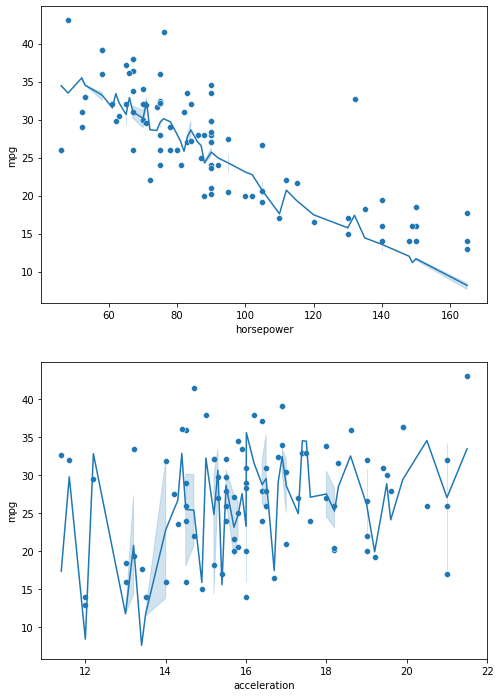

In [38]:
model_data3(mpg[['horsepower','acceleration']],mpg['mpg'])

Now, let's look at the ordinal version

Training R^2 0.5195460155384136
Testing R^2 0.5356069523378812


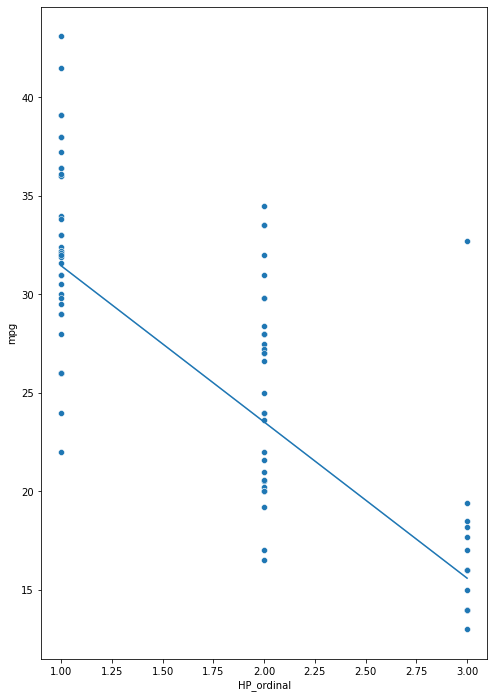

In [39]:
model_data3(mpg[['HP_ordinal']],mpg['mpg'])

This approach isn't ideal because it assumes equal distance between horsepower category 1 2 and 3, but our categories basically stretch from 0 to 80, 80 to 100, and 100+

To look at the dummy coded version, we actually have to pass in both columns of data

In [40]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'Type', 'chevrolet',
       'nevs', 'nissan', 'peugeot', 'toyota', 'volkswagen', 'volvo', 'Sedan0',
       'japan', 'usa', 'MediumHP', 'HighHP', 'HP_ordinal'],
      dtype='object')

Training R^2 0.5223752522115026
Testing R^2 0.5323165718118901
y =    -8.593*MediumHP +  -15.544*HighHP +    31.738


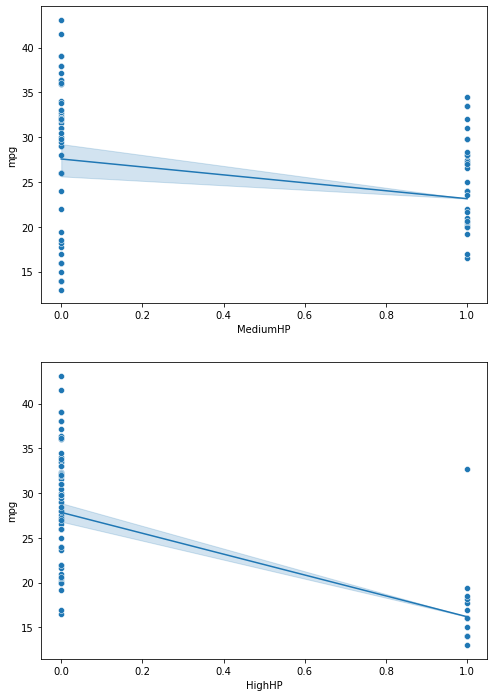

In [41]:
model_data3(mpg[['MediumHP', 'HighHP']],mpg['mpg'])

Firstly, let's see what the equation means

y = -8.593*Medium_HP +  -15.544*High_HP +    31.7

In [42]:
-8.593*0 +  -15.544*0 +    31.7 # low horsepower

31.7

In [43]:
-8.593*1 +  -15.544*0 +    31.7  # medium horsepower

23.107

In [44]:
-8.593*0 +  -15.544*1 +    31.7 # high horsepower

16.156

In [45]:
mpg[((mpg['MediumHP']==0) & (mpg['HighHP']==0))]['mpg'].mean() # low horsepower

31.858914728682166

In [46]:
mpg[((mpg['MediumHP']==1) & (mpg['HighHP']==0))]['mpg'].mean() # medium horsepower

23.560233918128656

In [47]:
mpg[((mpg['MediumHP']==0) & (mpg['HighHP']==1))]['mpg'].mean() # high horsepower

16.41034482758621

So now, our model fit line looks a little different... a little weirder. And that actually makes some sense! Check out this link:

https://stats.stackexchange.com/questions/172729/in-multiple-linear-regression-why-does-a-plot-of-predicted-points-not-lie-in-a

Basically, we cannot have a have a straight line because a straight line isn't being used to find the best fitting model. Its now fitting a plane. And, in order to draw a line, you actually need to hold the other betas (i.e., predictors) constant. 

In this case with the dummy coded variables, its not hard to imagine holding variables constant. We can set High_HP to 1 to see the line for Medium_HP, or vice versa. But this gets more complicated with continuous variables



Training R^2 0.7027896759116119
Testing R^2 0.6180631676936014


y =    -0.09*horsepower +  -0.006*weight +    51.049


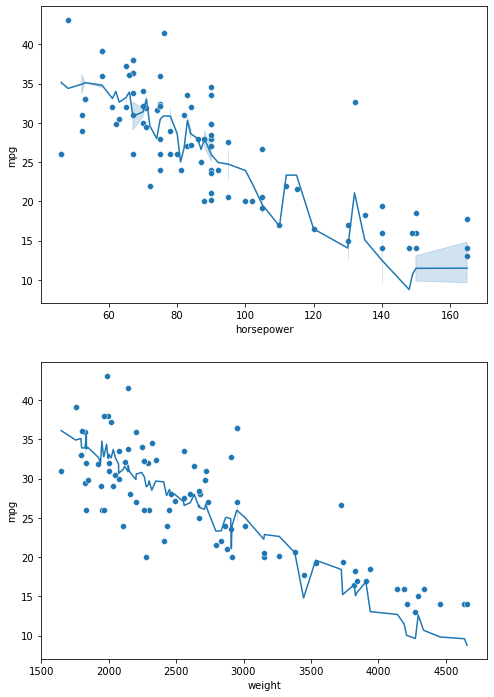

In [48]:
model_data3(mpg[['horsepower','weight']],mpg['mpg'])

The below predicted values are the predictions for the combinations of horsepower and weight. So, the y is being changed based on values of both horsepower and weight, not just one of those values.

You could set horsepower or weight to be constant, which would fix that parameter value and thus give you a line. But that is not typically done

Before we leave, let's just try something wild. Let's pass in all our variables in our function and see what happens

In [49]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'Type', 'chevrolet',
       'nevs', 'nissan', 'peugeot', 'toyota', 'volkswagen', 'volvo', 'Sedan0',
       'japan', 'usa', 'MediumHP', 'HighHP', 'HP_ordinal'],
      dtype='object')

Note we can't quite just pass in mpg.columns because some of these are strings, remember? 

Training R^2 0.8431725137724766
Testing R^2 0.7913036281760046


y =    -0.117*cylinders +  -0.003*displacement +  -0.064*horsepower +  -0.003*weight +  -0.154*acceleration +  0.919*model_year +  3.821*Sedan0 +  0.146*japan +  -1.463*usa +  0.524*chevrolet +  1.017*nissan +  0.778*peugeot +  0.597*nevs +  0.42*toyota +  0.582*volkswagen +  -0.653*volvo +    -29.341


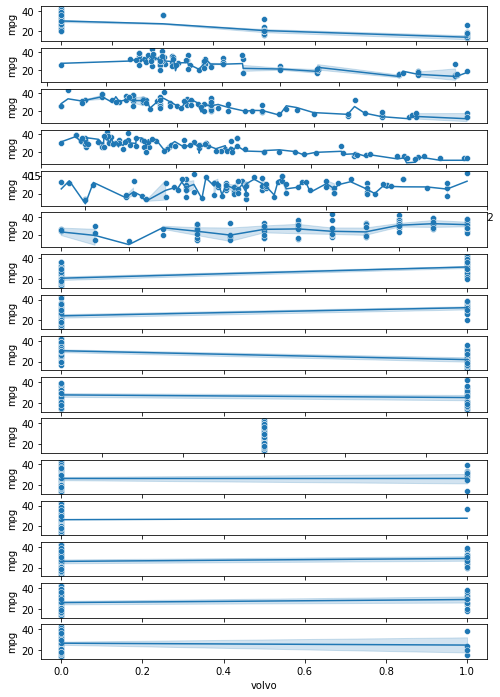

In [50]:
model_data3(mpg[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'Sedan0',
       'japan', 'usa', 'chevrolet', 'nissan', 'peugeot', 'nevs', 'toyota',
       'volkswagen', 'volvo']],mpg['mpg'])

Wow! Look at this!

That's pretty great at explaining a lot of variance. Though, we basically just put everything into the model and it seems very complex! Next class, we will talk about why this approach may be bad